In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### EDA or Feature Engineering

In [5]:
### Whenever we have features like date----->we need to split it into day month and yr
df['Journey_Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Journey_Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Journey_Year']=df['Date_of_Journey'].str.split('/').str[2]

In [6]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Date       object
Journey_Month      object
Journey_Year       object
dtype: object

In [8]:
### newly created features are of object type we need to convert this into int....
df['Journey_Date']=df['Journey_Date'].astype(int)
df['Journey_Month']=df['Journey_Month'].astype(int)
df['Journey_Year']=df['Journey_Year'].astype(int)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Date        int32
Journey_Month       int32
Journey_Year        int32
dtype: object

In [10]:
df.drop(['Date_of_Journey'],inplace=True,axis=1)

In [11]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [15]:
### Total stop and route is null in above recor So we will assume that their is only one stop from Delhi to Cochin
df['Total_Stops'].fillna('1 stop',inplace=True)

In [16]:
df['Total_Stops']=df['Total_Stops'].replace("non-stop","0 stop")
df['Total_Stops']=df['Total_Stops'].str.split(' ').str[0]

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [18]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Date        int32
Journey_Month       int32
Journey_Year        int32
dtype: object

In [19]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [20]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
Journey_Date        int32
Journey_Month       int32
Journey_Year        int32
dtype: object

In [21]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]


In [22]:
df['Departure_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute']=df['Dep_Time'].str.split(':').str[1]

In [23]:

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [24]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price                int64
Journey_Date         int32
Journey_Month        int32
Journey_Year         int32
Arrival_Hour        object
Arrival_Minute      object
Departure_Hour      object
Departure_Minute    object
dtype: object

In [25]:
### now convert data type of above newly created features to int
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)

In [26]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price                int64
Journey_Date         int32
Journey_Month        int32
Journey_Year         int32
Arrival_Hour         int32
Arrival_Minute       int32
Departure_Hour       int32
Departure_Minute     int32
dtype: object

In [27]:
df.drop(['Arrival_Time'],inplace=True,axis=1)
df.drop(['Dep_Time'],inplace=True,axis=1)

In [28]:

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [29]:

### Information of Route is same as total Stop So we will dropnthis column

df.drop(['Route'],inplace=True,axis=1)


In [30]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i]+ " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour



In [31]:
df['Duration']=duration

In [32]:
DurationHour=df['Duration'].str.split(' ').str[0]
DurationMinute=df['Duration'].str.split(' ').str[1]


In [33]:
df['Duration_Hour']=DurationHour.str.split("h").str[0]
df['Duration_Minute']=DurationMinute.str.split("m").str[0]

In [34]:
df['Duration_Hour']=df['Duration_Hour'].astype(int)
df['Duration_Minute']=df['Duration_Minute'].astype(int)

In [35]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [36]:
df.drop(['Duration'],inplace=True,axis=1)

In [37]:
### Now we will convert Categorial Value using labelEncoding...Assigns value according to priority

from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

df['Airline']=encode.fit_transform(df['Airline'])
df['Source']=encode.fit_transform(df['Source'])
df['Destination']=encode.fit_transform(df['Destination'])
df['Additional_Info']=encode.fit_transform(df['Additional_Info'])


In [38]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4,45


In [39]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [42]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [43]:
model.get_support() ## to check which features get selected by SelectFromModel

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True])

In [44]:
selectedFeatures=X_train.columns[model.get_support()]


In [45]:
selectedFeatures

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_Date', 'Journey_Month', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Duration_Hour',
       'Duration_Minute'],
      dtype='object')

In [46]:
## now drop all columns are are not selected from X_train and X_test
X_train.drop(['Journey_Year'],axis=1,inplace=True)
X_test.drop(['Journey_Year'],axis=1,inplace=True)

C:\Users\Amanpreet Oberoi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
X_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
7106,8,0,2,0,8,6,4,8,35,5,55,2,40
7904,1,2,1,1,8,1,6,6,50,5,15,25,35
4861,4,2,1,2,5,12,6,12,35,14,35,22,0
9375,3,2,1,1,8,15,6,21,0,6,40,14,20
155,1,3,0,2,8,9,5,7,55,8,20,23,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,3,0,1,5,12,6,4,40,6,30,22,10
4859,1,2,1,2,8,9,6,19,15,22,0,21,15
3264,4,2,1,1,8,3,3,4,25,8,0,20,25
9845,4,2,1,1,5,18,5,12,35,11,30,25,5


### Apply ML model

In [48]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [49]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [51]:
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, random_state=42)

In [52]:
rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42)

In [53]:
y_pred=rf.predict(X_test)

C:\Users\Amanpreet Oberoi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

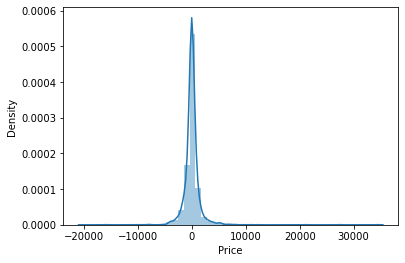

In [54]:
import seaborn as sns

sns.distplot(y_test-y_pred)

In [55]:
from sklearn.metrics import mean_squared_error
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9664485477263511
0.87407325356059


In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 786.8680726002485
MSE: 2550828.911364324
RMSE: 1597.1314633943957


In [57]:
import pickle
file = open('FlightPricePrediction.pkl', 'wb')
pickle.dump(rf, file)

In [58]:
model = open('FlightPricePrediction.pkl','rb')
result = pickle.load(model)

In [59]:
y_prediction = result.predict(X_test)

In [60]:
metrics.r2_score(y_test, y_prediction)

0.87407325356059